In [17]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
from tensorflow.keras.callbacks import TensorBoard

In [18]:
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate
from keras import Model

input_img = Input(shape=(256, 256, 3))
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPooling2D((2, 2))(x2)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
x6 = MaxPooling2D((2, 2))(x5)
x7 = Conv2D(256, (3, 3), activation='relu', padding='same')(x6)
x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
x9 = MaxPooling2D((2, 2))(x8)
x10 = Conv2D(512, (3, 3), activation='relu', padding='same')(x9)
x11 = Conv2D(512, (3, 3), activation='relu', padding='same')(x10)
x12 = MaxPooling2D((2, 2))(x11)
x13 = Conv2D(1024, (3, 3), activation='relu', padding='same')(x12)
x14 = Conv2D(1024, (3, 3), activation='relu', padding='same')(x13)
x15 = Conv2DTranspose(512, 2, (2, 2), padding="same")(x14)
x16 = Concatenate()([x11, x15])     
x17 = Conv2D(512, (3, 3), activation='relu', padding='same')(x16)
x18 = Conv2D(512, (3, 3), activation='relu', padding='same')(x17)
x19 = Conv2DTranspose(256, 2, (2, 2), padding="same")(x18)
x20 = Concatenate()([x8, x19])
x21 = Conv2D(256, (3, 3), activation='relu', padding='same')(x20)
x22 = Conv2D(256, (3, 3), activation='relu', padding='same')(x21)
x23 = Conv2DTranspose(128, 2, (2, 2), padding="same")(x22)
x24 = Concatenate()([x5, x23]) 
x25 = Conv2D(128, (3, 3), activation='relu', padding='same')(x24)
x26 = Conv2D(64, (3, 3), activation='relu', padding='same')(x25)
x27 = Conv2DTranspose(64, 2, (2, 2), padding="same")(x26)
x28 = Concatenate()([x2, x27]) 
x29 = Conv2D(64, (3, 3), activation='relu', padding='same')(x28)
x30 = Conv2D(64, (3, 3), activation='relu', padding='same')(x29)
x31 = Conv2D(3, (1, 1), activation='sigmoid', padding='same')(x30) 

u_net = Model(input_img, x31)
u_net.summary()
u_net.compile(optimizer='adam', loss='mean_squared_error')

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_57 (Conv2D)          (None, 256, 256, 64)         1792      ['input_4[0][0]']             
                                                                                                  
 conv2d_58 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_57[0][0]']           
                                                                                                  
 max_pooling2d_12 (MaxPooli  (None, 128, 128, 64)         0         ['conv2d_58[0][0]']           
 ng2D)                                                                                      

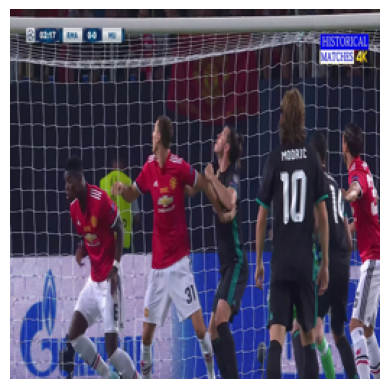

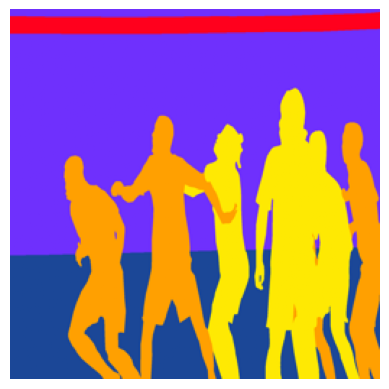

In [19]:
import numpy as np
import matplotlib.pyplot as plt
images = np.load('images.npy')
masks = np.load('masks.npy')
images = images.astype('float32') / 255.
masks = masks.astype('float32') / 255.
import random
index = random.randint(0, len(images))
plt.imshow(images[index])
plt.axis('off')
plt.show()
plt.imshow(masks[index])
plt.axis('off')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)
log_dir = 'logs/your_unet_visualization'
tensorboard_callback = TensorBoard(log_dir=log_dir)
history = u_net.fit(X_train, y_train, epochs=70, batch_size=4, shuffle=True, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/70
20/20 [==============================] - 8s 200ms/step - loss: 0.0681 - val_loss: 0.0791
Epoch 2/70
20/20 [==============================] - 4s 177ms/step - loss: 0.0659 - val_loss: 0.0715
Epoch 3/70
20/20 [==============================] - 4s 181ms/step - loss: 0.0583 - val_loss: 0.0688
Epoch 4/70
20/20 [==============================] - 3s 173ms/step - loss: 0.0589 - val_loss: 0.0681
Epoch 5/70
20/20 [==============================] - 3s 171ms/step - loss: 0.0539 - val_loss: 0.0634
Epoch 6/70
20/20 [==============================] - 3s 171ms/step - loss: 0.0525 - val_loss: 0.0627
Epoch 7/70
20/20 [==============================] - 3s 173ms/step - loss: 0.0455 - val_loss: 0.0668
Epoch 8/70
20/20 [==============================] - 4s 178ms/step - loss: 0.0438 - val_loss: 0.0473
Epoch 9/70
20/20 [==============================] - 4s 178ms/step - loss: 0.0363 - val_loss: 0.0401
Epoch 10/70
20/20 [==============================] - 3s 175ms/step - loss: 0.0306 - val_loss: 0.0378

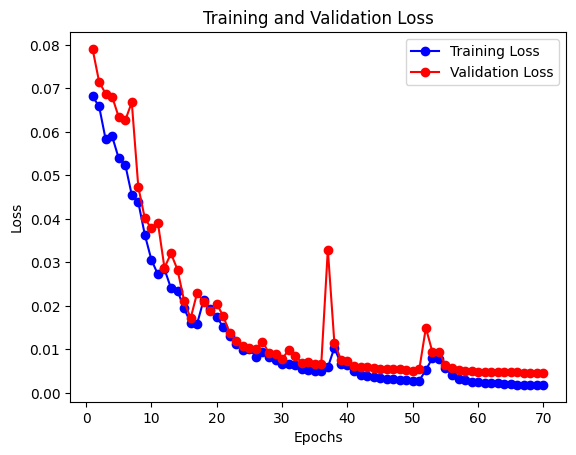

In [21]:
epochs = range(1, len(history.history["loss"]) + 1)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 369ms/step - loss: 0.0045
Test Loss: 0.004538183566182852
1/1 [==============================] - 0s 145ms/step


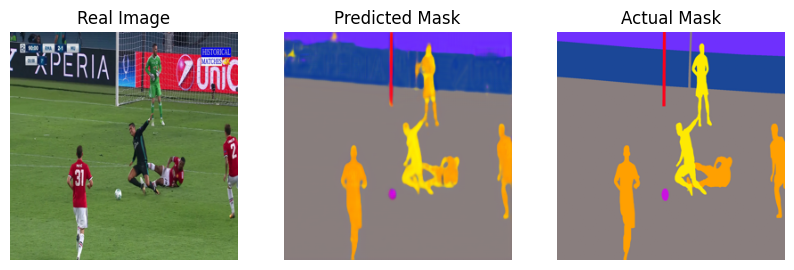

In [ ]:
import random
test_loss = u_net.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
index = random.randint(0, len(X_test) - 1)
test_image = X_test[index]
test_mask = y_test[index]
predicted_mask = u_net.predict(np.expand_dims(test_image, axis=0))[0]
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(test_image)
axes[0].set_title('Real Image')
axes[0].axis('off')
axes[1].imshow(predicted_mask, cmap='gray')
axes[1].set_title('Predicted Mask')
axes[1].axis('off')
axes[2].imshow(test_mask, cmap='gray')
axes[2].set_title('Actual Mask')
axes[2].axis('off')
plt.show()

In [24]:
u_net.save("unet_football.h5")

/home/shrey/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
